In [1]:
import numpy as np

from sim.gen_matrix import *
from scipy.sparse import csr_matrix, csgraph

from sim.world import World

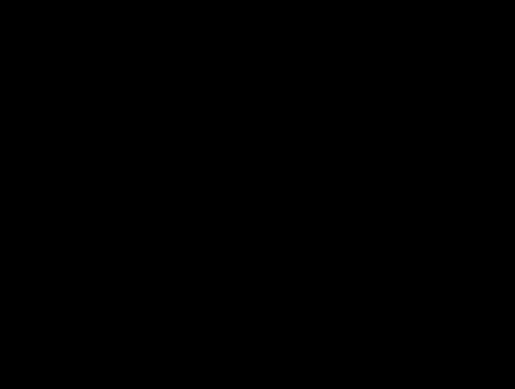

In [2]:
A = weighted_directed_grid4x4(seed=42)
G = nx.from_scipy_sparse_array(A, create_using=nx.DiGraph, edge_attribute="weight")
layout = nx.layout.spring_layout(G)
ipx.network(G, layout=layout)

In [23]:
csgraph.breadth_first_order(A, 0, directed=True)[0]

array([ 0,  1,  4,  2,  5,  8,  3,  6,  9, 12,  7, 10, 13, 11, 14, 15],
      dtype=int32)

In [60]:
world = World()
bfo = csgraph.breadth_first_order(world.get_map(), 0, directed=True)[0]
bfo

array([ 0,  1,  4,  2,  5,  8,  3,  6,  9, 12,  7, 10, 13, 11, 14, 15],
      dtype=int32)

In [61]:
bfo = csgraph.breadth_first_order(world.get_map(), 0, directed=True)[0]
wdm = csgraph.floyd_warshall(world.get_map(), directed=True)
dist_mat = csgraph.floyd_warshall(world.get_map(), directed=True, unweighted=True)
l = [i for i in bfo if world.is_parking_lot(i) and dist_mat[0, i] <= 3]
print(l)

distances = np.array([(ii, wdm[0, ii]) for ii in l])
print(distances)
min_distance = np.argsort(distances, axis=0)
print(min_distance[0, 1])

[np.int32(9), np.int32(12)]
[[ 9.          1.5674722 ]
 [12.          2.15794486]]
0


In [10]:
def shortest_path_csr(adj: csr_matrix, start: int, end: int):
    """
    Compute shortest path in a directed weighted graph stored as CSR.

    Parameters
    ----------
    adj : csr_matrix
        Directed adjacency matrix with non-negative weights.
        adj[i, j] = weight of edge i -> j (0 means no edge unless explicitly stored).
    start : int
        Start node index.
    end : int
        End node index.

    Returns
    -------
    distance : float
        Shortest path distance (np.inf if unreachable).
    path : list[int]
        Node sequence from start to end (empty if unreachable).
    """

    # Run Dijkstra from the start node
    dist, predecessors = csgraph.dijkstra(csgraph=adj, directed=True, indices=start, return_predecessors=True)

    distance = dist[end]

    # If unreachable
    if np.isinf(distance):
        return np.inf, []

    # Reconstruct path by walking predecessors backwards
    path = []
    current = end

    while current != -9999:  # SciPy sentinel for no predecessor
        path.append(current)
        if current == start:
            break
        current = predecessors[current]

    path.reverse()
    return distance, path

In [11]:
dist, path = shortest_path_csr(world.get_map(), 0, 15)
print(dist, path)

2.4603709813407195 [np.int32(0), np.int32(4), np.int32(8), np.int32(9), np.int32(10), np.int32(11), 15]
